## Ćwiczenie 1 (0,5 pkt)

Narysować wykres funkcji $L(\theta)$ dla $\theta\in[0,1]$. Zobaczyć, że maksimum jest w punkcie $\frac{7}{10}$.

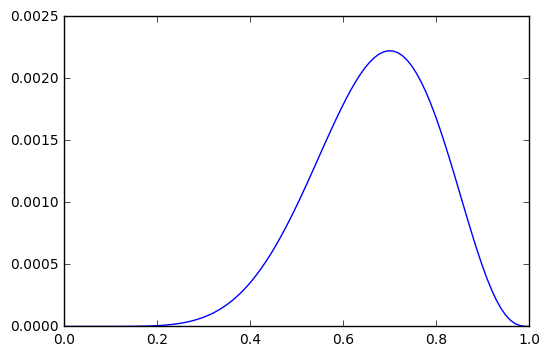

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline 

def L(theta):
    return theta**7 * (1-theta)**3

theta_grid = np.linspace(0,1,100)
L_values = L(theta_grid)
plt.plot(theta_grid, L_values)

## Ćwiczenie 2 (0,5 pkt)

Symulator "prawdziwej" monety.

Napisać funkcję flip_coin, która generuje wynik nb_flips rzutów monetą z prawdopodobieństwem wypadnięcia orła równym theta. Funkcja ma zwrócić tablicę zer i jedynek ($0$ - RESZKA, $1$ - ORZEŁ).


In [2]:
def flip_coin(theta, nb_flips):
    result = np.random.binomial(1, theta, nb_flips)
    
    assert len(result) == nb_flips
    return result

result = flip_coin(0.7, 1000)
sum(result)

689

## Ćwiczenie 3 (1 pkt)

Pierwszy model generatywny rzutu monetą.

Napisać klasę CoinML (Maximum Likelihood) posiadającą metody fit i toss:
- fit - przyjmuje listę obserwacji i oblicza self.theta korzystając z wzoru powyżej.
- toss - generuje jeden rzut monetą z prawdopodobieństwem self.theta i zwraca 0 lub 1.

In [3]:
class CoinML(object):

    def __init__(self):
        self.theta = None

    def fit(self, X):
        self.theta = sum(X) / len(X)

    def toss(self):
        return flip_coin(self.theta, 1)[0]
    
    
coin = CoinML()
result = flip_coin(0.7, 1000)

coin.fit(result)

coin.toss()

1

## Ćwiczenie 4 (1 pkt)

Napisać klasę CoinMAP (Maximum A Posteriori) posiadającą metody fit i toss:
- konstruktor - przyjmuje prior, który może np. być słownikiem (klucz - $\theta$, wartość - jej prawdopodobieństwo a priori),
- fit - przyjmuje listę obserwacji i uaktualnia self.knowledge, korzystając ze wzoru Bayesa, a następnie ustawia self.theta wybierając odpowiednią wartość z self.knowledge,
- toss - generuje jeden rzut monetą z prawdopodobieństwem self.theta i zwraca 0 lub 1.

In [4]:
class CoinMAP(object):

    def __init__(self, prior):
        self.knowledge = prior
        self.theta = 0
        
        max_probability = 0
        for key in prior:
            if prior[key] > max_probability:
                max_probability = prior[key]
                self.theta = key
        
    def fit(self, X):
        
        new_knowledge = {}
        heads = sum(X)
        tosses = len(X)
        
        p_B = 0
        
        for key in self.knowledge:
            p_B += key**heads * (1-key)**(tosses-heads) * self.knowledge[key]
        
        for key in self.knowledge:
            p_B_Ai = key**heads * (1-key)**(tosses-heads)
            p_Ai = self.knowledge[key]
            new_knowledge[key] = p_Ai * p_B_Ai / p_B
        
        self.knowledge = new_knowledge
        
        
        max_probability = 0
        for key in self.knowledge:
            if self.knowledge[key] > max_probability:
                max_probability = self.knowledge[key]
                self.theta = key

    def toss(self):
        return flip_coin(self.theta, 1)[0]


    
model = CoinMAP({0.5: 0.8, 0.6: 0.2})
model.fit(np.array([1,0,1,1,1,0,0,1,1,1]))
print ("model.knowledge powinno wyjść {0.5: 0.686, 0.6: 0.314}")
print (model.knowledge)
print ("Powinno wyjść 0.5:", model.theta)
print ("Powinno wyjść 1:", sum(model.knowledge.values()))

model = CoinMAP({0.5: 0.5, 0.6: 0.2, 0.8: 0.3})
model.fit(np.array([1,0,1,1,1,0,0,1,1,1]))
print ("model.knowledge powinno wyjść {0.5: 0.362, 0.6: 0.265, 0.8: 0.373}")
print (model.knowledge)
print ("Powinno wyjść 0.8:", model.theta)
print ("Powinno wyjść 1:", sum(model.knowledge.values()))

model.knowledge powinno wyjść {0.5: 0.686, 0.6: 0.314}
{0.5: 0.68556676315468579, 0.6: 0.31443323684531421}
Powinno wyjść 0.5: 0.5
Powinno wyjść 1: 1.0
model.knowledge powinno wyjść {0.5: 0.362, 0.6: 0.265, 0.8: 0.373}
{0.5: 0.36171237227008995, 0.6: 0.26543735345984282, 0.8: 0.37285027427006717}
Powinno wyjść 0.8: 0.8
Powinno wyjść 1: 1.0


## Ćwiczenie 5 (2 pkt)

Napisać klasę CoinBest, która działa jak CoinMAP z tą różnicą, że self.theta jest obliczane powyższym wzorem, a nie wybierane spośród wartości self.knowledge.

In [5]:
class CoinBest(object):

    def __init__(self, prior):
        self.knowledge = prior
        self.theta = 0
        
        self.theta = 0
        for key in self.knowledge:
            self.theta += key * self.knowledge[key]
        
    def fit(self, X):
        
        new_knowledge = {}
        heads = sum(X)
        tosses = len(X)
        
        p_B = 0
        
        for key in self.knowledge:
            p_B += key**heads * (1-key)**(tosses-heads) * self.knowledge[key]
        
        for key in self.knowledge:
            p_B_Ai = key**heads * (1-key)**(tosses-heads)
            p_Ai = self.knowledge[key]
            new_knowledge[key] = p_Ai * p_B_Ai / p_B
        
        self.knowledge = new_knowledge
        
        
        self.theta = 0
        for key in self.knowledge:
            self.theta += key * self.knowledge[key]

    def toss(self):
        return flip_coin(self.theta, 1)[0]

model = CoinBest({0.5: 0.8, 0.6: 0.2})
model.fit(np.array([1,0,1,1,1,0,0,1,1,1]))
print ("model.knowledge powinno wyjść {0.5: 0.686, 0.6: 0.314}")
print (model.knowledge)
print ("Powinno wyjść około 0.53:", model.theta)
print ("Powinno wyjść 1:", sum(model.knowledge.values()))

model = CoinBest({0.5: 0.5, 0.6: 0.2, 0.8: 0.3})
model.fit(np.array([1,0,1,1,1,0,0,1,1,1]))
print ("model.knowledge powinno wyjść {0.5: 0.362, 0.6: 0.265, 0.8: 0.373}")
print (model.knowledge)
print ("Powinno wyjść około 0.64:", model.theta)
print ("Powinno wyjść 1:", sum(model.knowledge.values()))

model.knowledge powinno wyjść {0.5: 0.686, 0.6: 0.314}
{0.5: 0.68556676315468579, 0.6: 0.31443323684531421}
Powinno wyjść około 0.53: 0.531443323685
Powinno wyjść 1: 1.0
model.knowledge powinno wyjść {0.5: 0.362, 0.6: 0.265, 0.8: 0.373}
{0.5: 0.36171237227008995, 0.6: 0.26543735345984282, 0.8: 0.37285027427006717}
Powinno wyjść około 0.64: 0.638398817627
Powinno wyjść 1: 1.0


## Ćwiczenie 6 (1 pkt)

Zasymulować metodą Monte Carlo przebieg rozgrywki dla gracza, który:
- nie zmienia bramki,
- zawsze zmienia bramkę,

w przypadku:
- zwykłym,
- z piorunem, a jeśli trafi w nagrodę to:
	- powtórka,
	- przegrana.

Wypisać średnią wygraną.

In [6]:
# Bez straty ogólności nagroda może być zawsze w bramce nr 1. Gracz wybiera losowo.
# Zdaję sobię sprawę że część operacji jest wykonywana niepotrzebnie. 
# Wykonuję je jednak dla zasady, przyjmując, że apriori nie mam pojęcia co ma znaczenie, a co nie.
liczba_gier = 100000

####Brak zmiany bramki:
##Zwykły przypadek:
wygrane = 0
for i in range (liczba_gier):
    wybor = np.argmax(np.random.multinomial(1, [1/3,1/3,1/3]))
    if wybor == 0:
        wygrane += 1
print("Procent wygranych w standardowym przypadku bez zmiany bramki: {0:.2f}%".format(100*wygrane/liczba_gier))

##Piorun z powtórką całej gry:
wygrane = 0
for i in range (liczba_gier):
    
    wybor = np.argmax(np.random.multinomial(1, [1/3,1/3,1/3]))
    prawd_pioruna = [1/2,1/2,1/2]
    prawd_pioruna[wybor] = 0
    wybor_pioruna = np.argmax(np.random.multinomial(1, prawd_pioruna))
    
    while (wybor_pioruna ==0):
        wybor = np.argmax(np.random.multinomial(1, [1/3,1/3,1/3]))
        prawd_pioruna = [1/2,1/2,1/2]
        prawd_pioruna[wybor] = 0
        wybor_pioruna = np.argmax(np.random.multinomial(1, prawd_pioruna))
    
    if wybor == 0:
        wygrane += 1
print("Procent wygranych w przypadku pioruna z powtórką bez zmiany bramki: {0:.2f}%".format(100*wygrane/liczba_gier))



##Piorun z przegraną:
wygrane = 0
for i in range (liczba_gier):
    
    wybor = np.argmax(np.random.multinomial(1, [1/3,1/3,1/3]))
    prawd_pioruna = [1/2,1/2,1/2]
    prawd_pioruna[wybor] = 0
    wybor_pioruna = np.argmax(np.random.multinomial(1, prawd_pioruna))
    
    if wybor == 0:
        wygrane += 1
print("Procent wygranych w przypadku pioruna z przegraną bez zmiany bramki: {0:.2f}%".format(100*wygrane/liczba_gier))  


####Zmiana bramki:
##Zwykły przypadek:
wygrane = 0
for i in range (liczba_gier):
    wybor = np.argmax(np.random.multinomial(1, [1/3,1/3,1/3]))
    if wybor != 0:
        wygrane += 1
print("Procent wygranych w standardowym przypadku ze zmianą bramki: {0:.2f}%".format(100*wygrane/liczba_gier))

##Piorun z powtórką całej gry:
wygrane = 0
for i in range (liczba_gier):
    
    wybor = np.argmax(np.random.multinomial(1, [1/3,1/3,1/3]))
    prawd_pioruna = [1/2,1/2,1/2]
    prawd_pioruna[wybor] = 0
    wybor_pioruna = np.argmax(np.random.multinomial(1, prawd_pioruna))
    
    while (wybor_pioruna ==0):
        wybor = np.argmax(np.random.multinomial(1, [1/3,1/3,1/3]))
        prawd_pioruna = [1/2,1/2,1/2]
        prawd_pioruna[wybor] = 0
        wybor_pioruna = np.argmax(np.random.multinomial(1, prawd_pioruna))
    
    if wybor != 0:
        wygrane += 1
print("Procent wygranych w przypadku pioruna z powtórką ze zmianą bramki: {0:.2f}%".format(100*wygrane/liczba_gier))



##Piorun z przegraną:
wygrane = 0
for i in range (liczba_gier):
    
    wybor = np.argmax(np.random.multinomial(1, [1/3,1/3,1/3]))
    prawd_pioruna = [1/2,1/2,1/2]
    prawd_pioruna[wybor] = 0
    wybor_pioruna = np.argmax(np.random.multinomial(1, prawd_pioruna))
    
    if wybor != 0 and wybor_pioruna!=0:
        wygrane += 1
print("Procent wygranych w przypadku pioruna z przegraną ze zmianą bramki: {0:.2f}%".format(100*wygrane/liczba_gier))  

Procent wygranych w standardowym przypadku bez zmiany bramki: 33.42%
Procent wygranych w przypadku pioruna z powtórką bez zmiany bramki: 50.10%
Procent wygranych w przypadku pioruna z przegraną bez zmiany bramki: 33.43%
Procent wygranych w standardowym przypadku ze zmianą bramki: 66.54%
Procent wygranych w przypadku pioruna z powtórką ze zmianą bramki: 49.87%
Procent wygranych w przypadku pioruna z przegraną ze zmianą bramki: 33.41%


## Ćwiczenie 7 (1 pkt)

Losujemy $k=100$ razy liczbę od $1$ do $m=200$ z rozkładem jednostajnym. Ile średnio różnych liczb wylosujemy?
Rozwiązać metodą Monte Carlo.

https://math.dartmouth.edu/archive/m19w03/public_html/Section6-5.pdf - czy wynik zgadza się z tw. 6.14?


In [7]:
def f(k, m, nb_simulations):
    avg_nb_integers = 0
    for i in range(nb_simulations):
        result = np.random.multinomial(k, np.ones(m)/m)
        avg_nb_integers += m - np.count_nonzero(result == 0)
    avg_nb_integers = avg_nb_integers / nb_simulations
    return avg_nb_integers

k = 100
m = 200
print ("{0} =?= {1}".format(f(k, m, nb_simulations=10000), m - (m * (1 - 1/float(m))**k)))

78.8942 =?= 78.84591270185442


## Ćwiczenie 8 (2 pkt)

Napisać funkcję, która przyjmuje parametry rozkładu normalnego: średnią oraz macierz kowariancji, liczbę sampli, a następnie sampluje punkty z tego rozkładu i rysuje na plaszczyźnie. Ponadto na rysunku należy zaznaczyć strzałkami wektory własne macierzy kowariancji (punkt zaczepienia to średnia rozkładu normalnego) i wypisać odpowiadające im wartości własne.

Narysować powyższe dla kilku różnych losowo wybranych średnich i macierzy kowariancji (http://stackoverflow.com/questions/619335/a-simple-algorithm-for-generating-positive-semidefinite-matrices).


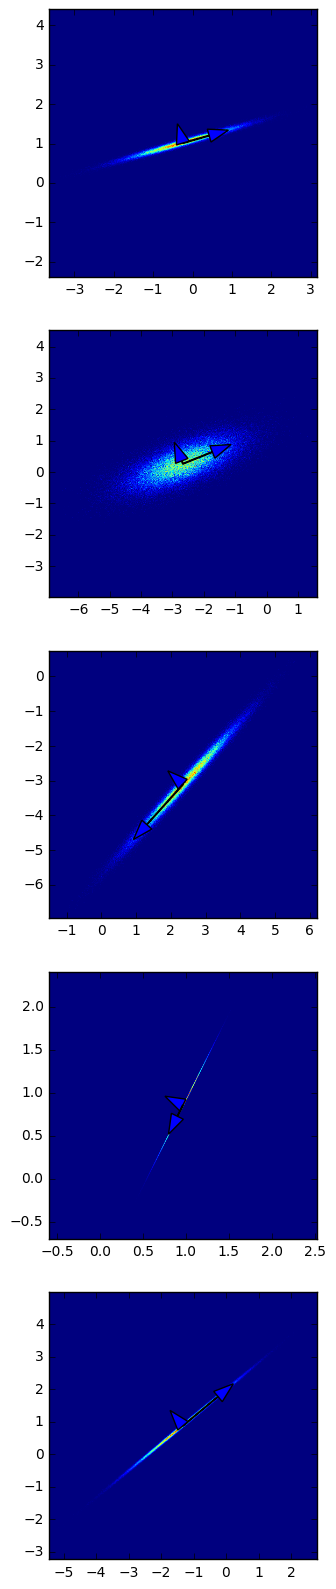

In [8]:
from scipy import random, linalg

def plot_normal(cov, mean):
    samples = np.random.multivariate_normal(mean, cov, size=100000)
    eigenvalues, eigenvectors = np.linalg.eig(cov)
    data_range = max([max(abs(x[0] - mean[0]), abs(x[1] - mean[1])) for x in samples])
    heatmap, xedges, yedges = np.histogram2d(samples.T[0], samples.T[1], bins=500, range =  [[mean[0]-data_range, mean[0]+data_range], [mean[1]-data_range, mean[1]+data_range]])
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    #plt.clf()
    plt.imshow(heatmap.T, extent = extent, origin='lower')
    
    plt.arrow(mean[0], mean[1], eigenvectors.T[0][0]*eigenvalues[0], eigenvectors.T[0][1]*eigenvalues[0], width = 0.005 * data_range)
    plt.arrow(mean[0], mean[1], eigenvectors.T[1][0]*eigenvalues[1], eigenvectors.T[1][1]*eigenvalues[1], width = 0.005 * data_range)
    

    
fig = plt.figure(1, figsize = (10, 20))

for i in range(5):
    plt.subplot(5,1,i+1)
    matrixSize = 2 
    A = random.rand(matrixSize,matrixSize)
    cov_matrix = np.dot(A,A.transpose())
    mean_vector = np.random.uniform(-5,5,2)
    
    plot_normal(cov_matrix, mean_vector)



# Ćwiczenie 9 (4 pkt)

Załóżmy, że mamy dane pochodzące dwuwymiarowego rozkładu normalnego o macierzy kowariancji będącej identycznością i średniej $\mu$. Będziemy estymowali $\mu$ korzystając z wzoru Bayesa.

1. Stworzyć siatkę 100x100 na kwadracie $[0,1]^2$ - to będą nasze potencjalne średnie.
2. Wylosować jeden punkt z siatki - to będzie "prawdziwa" średnia rozkładu. Oczywiście model jej nie zna.
3. Przyjąć jednostajny rozkład a priori (użyć floatów z największą możliwą precyzją), trzymać go w tablicy knowledge.
4. Powtórzyć nb_iters razy:
    - wygenerować nb_samples sampli z prawdziwego rozkładu,
    - uaktualnić knowledge na podstawie obserwacji,
    - narysować knowledge jako dwuwymiarowy heatmap.

Sprawdzić, co się stanie, gdy:
1. Siatka punktów będzie rzadsza, a prawdziwa średnia rozkładu będzie poza siatką.
2. Średnia rozkładu znajdzie się całkowicie poza badanym kwadratem, np. w punkcie $(1.2, 0.7)$.
3. Na początku wylosujemy 2 punkty z siatki - $\mu_1$ i $\mu_2$ - a następnie obserwacje będziemy samplować naprzemian z dwóch rozkładów gaussa, przy czym cały czas estymujemy $\mu$ tak, jak gdyby istniało dokładnie jedno prawdziwe.

wersja standardowa
[ 0.61616162  0.45454545]


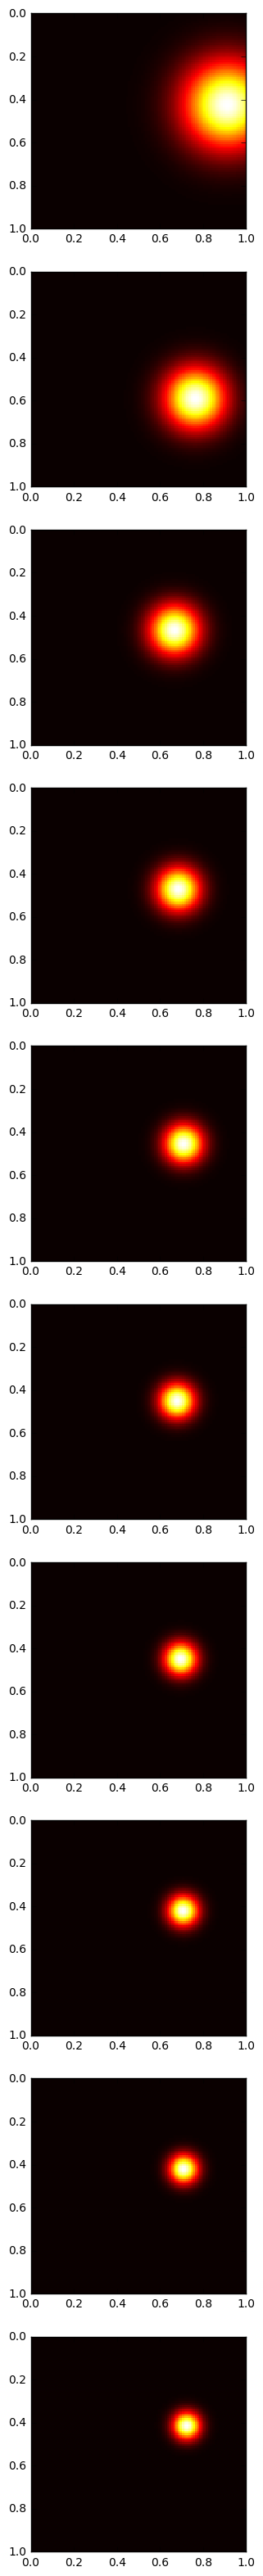

In [15]:
#WERSJA STANDARDOWA

from scipy.stats import multivariate_normal



nb_iters = 10
nb_samples = 50
grid_size = 100

var_arr = [[1,0],[0,1]]
mean_vector = [np.random.randint(0,grid_size), np.random.randint(0,grid_size)]
mean_vector = np.linspace(0,1,grid_size)[mean_vector]

print("wersja standardowa")
print(mean_vector[::-1])

knowledge = np.ones((grid_size, grid_size)) / (grid_size**2)

fig = plt.figure(1, figsize = (10, 40))
for i in range(nb_iters):
    samples = np.random.multivariate_normal(mean_vector, var_arr, size=nb_samples)
    new_knowledge = np.zeros((grid_size, grid_size))
    
    denominator = 0
    for row in range(grid_size):
        for column in range(grid_size):
            proposed_mean = np.linspace(0,1,grid_size)[[row, column]]
            denominator += np.prod(multivariate_normal.pdf(samples, mean=proposed_mean, cov=var_arr)) * knowledge[row, column]    
   
    for row in range(grid_size):
        for column in range(grid_size):
            proposed_mean = np.linspace(0,1,grid_size)[[row, column]]
            new_knowledge[row, column] = np.prod(multivariate_normal.pdf(samples, mean=proposed_mean, cov=var_arr)) * knowledge[row, column] / denominator
    knowledge = new_knowledge        
    
    plt.subplot(nb_iters,1,i+1)
    plt.imshow(knowledge, cmap='hot', interpolation='nearest', extent = [0,1,1,0])




RZADKA SIATKA, rozkład pomiędzy
[0.5626, 0.5526]
W wyniku estymujemy sąsiednie punkty siatki.


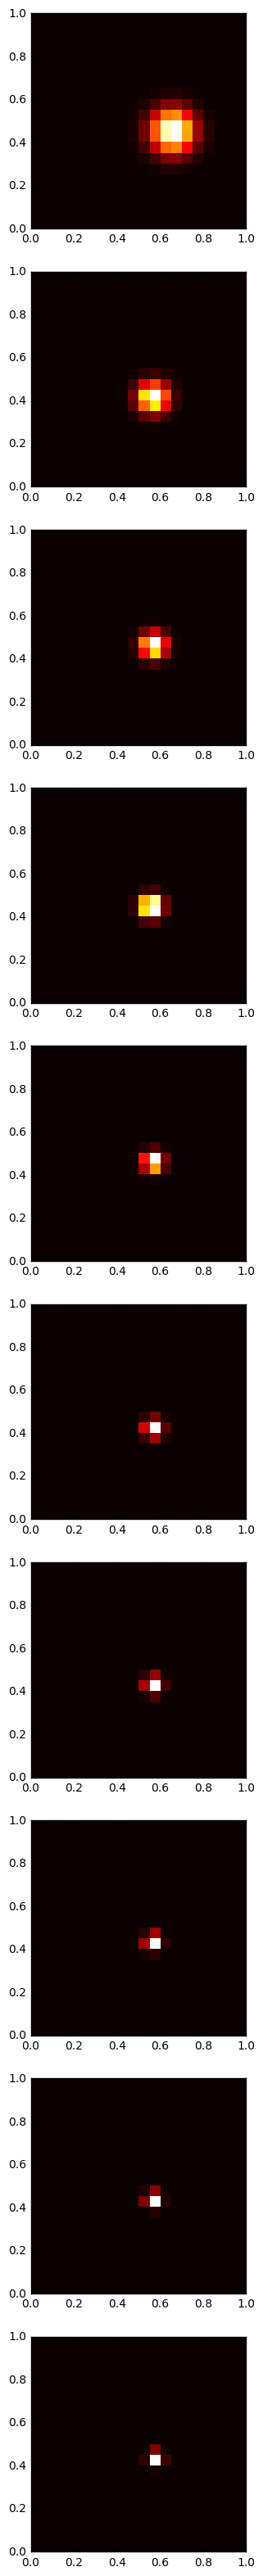

In [13]:
#RZADKA SIATKA, rozkład pomiędzy

from scipy.stats import multivariate_normal



nb_iters = 10
nb_samples = 200
grid_size = 20

var_arr = [[1,0],[0,1]]
mean_vector = [0.5526, 0.5626]

print("RZADKA SIATKA, rozkład pomiędzy")
print(mean_vector[::-1])

knowledge = np.ones((grid_size, grid_size)) / (grid_size**2)

fig = plt.figure(1, figsize = (10, 40))
for i in range(nb_iters):
    samples = np.random.multivariate_normal(mean_vector, var_arr, size=nb_samples)
    new_knowledge = np.zeros((grid_size, grid_size))
    
    denominator = 0
    for row in range(grid_size):
        for column in range(grid_size):
            proposed_mean = np.linspace(0,1,grid_size)[[row, column]]
            denominator += np.prod(multivariate_normal.pdf(samples, mean=proposed_mean, cov=var_arr)) * knowledge[row, column]    
   
    for row in range(grid_size):
        for column in range(grid_size):
            proposed_mean = np.linspace(0,1,grid_size)[[row, column]]
            new_knowledge[row, column] = np.prod(multivariate_normal.pdf(samples, mean=proposed_mean, cov=var_arr)) * knowledge[row, column] / denominator
    knowledge = new_knowledge        
    
    plt.subplot(nb_iters,1,i+1)
    plt.imshow(knowledge, cmap='hot', interpolation='nearest', extent = [0,1,1,0])

print("W wyniku estymujemy sąsiednie punkty siatki.")

średnia rozkładu poza badanym kwadratem
[0.7, 1.2]
W wyniku estymujemy punkty na krawędzi. Są bardzo jasne, bo suma prawdopodobieństwa musi być równa jeden, a wszędzie indziej są bliskie zeru.


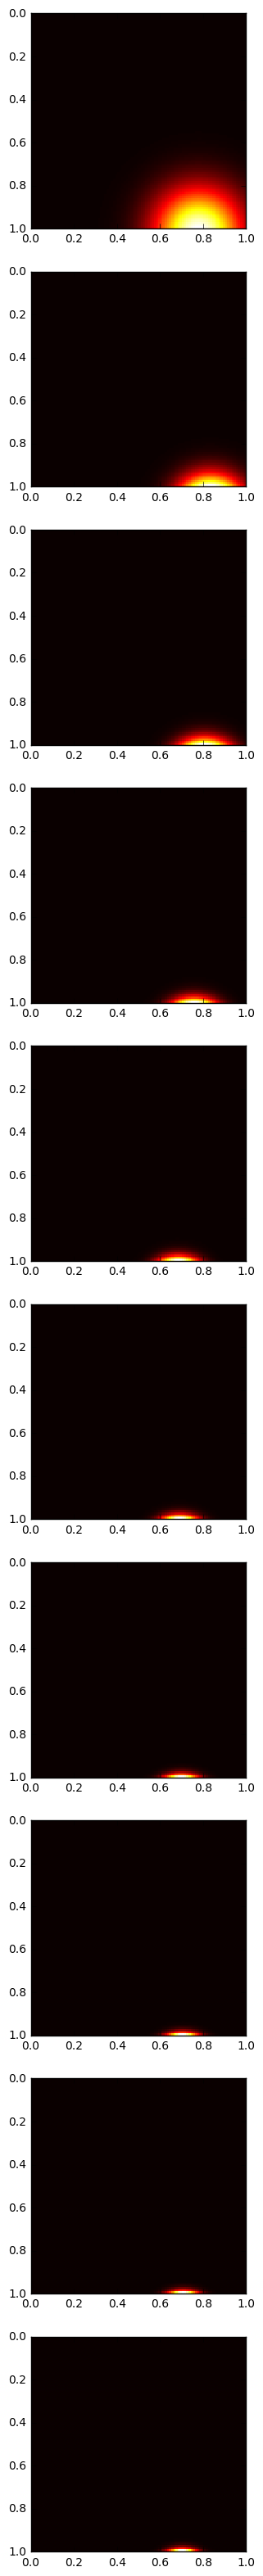

In [18]:
#średnia rozkładu poza badanym kwadratem

from scipy.stats import multivariate_normal



nb_iters = 10
nb_samples = 50
grid_size = 100

var_arr = [[1,0],[0,1]]
mean_vector = [1.2, 0.7]

print("średnia rozkładu poza badanym kwadratem")
print(mean_vector[::-1])

knowledge = np.ones((grid_size, grid_size)) / (grid_size**2)

fig = plt.figure(1, figsize = (10, 40))
for i in range(nb_iters):
    samples = np.random.multivariate_normal(mean_vector, var_arr, size=nb_samples)
    new_knowledge = np.zeros((grid_size, grid_size))
    
    denominator = 0
    for row in range(grid_size):
        for column in range(grid_size):
            proposed_mean = np.linspace(0,1,grid_size)[[row, column]]
            denominator += np.prod(multivariate_normal.pdf(samples, mean=proposed_mean, cov=var_arr)) * knowledge[row, column]    
   
    for row in range(grid_size):
        for column in range(grid_size):
            proposed_mean = np.linspace(0,1,grid_size)[[row, column]]
            new_knowledge[row, column] = np.prod(multivariate_normal.pdf(samples, mean=proposed_mean, cov=var_arr)) * knowledge[row, column] / denominator
    knowledge = new_knowledge        
    
    plt.subplot(nb_iters,1,i+1)
    plt.imshow(knowledge, cmap='hot', interpolation='nearest', extent = [0,1,1,0])
    
print("W wyniku estymujemy punkty na krawędzi. Są bardzo jasne, bo suma prawdopodobieństwa musi być równa jeden, a wszędzie indziej są bliskie zeru.")

Dwa rozkłady
[0.3, 0.3]
[0.7, 0.7]
Estymowany rozkład ma wartość oczekiwaną równą średniej wyjściowych wartości oczekiwanych. Wynika to z tego, że zakładamy tu normalność rozkładu, który nie jest normalny.


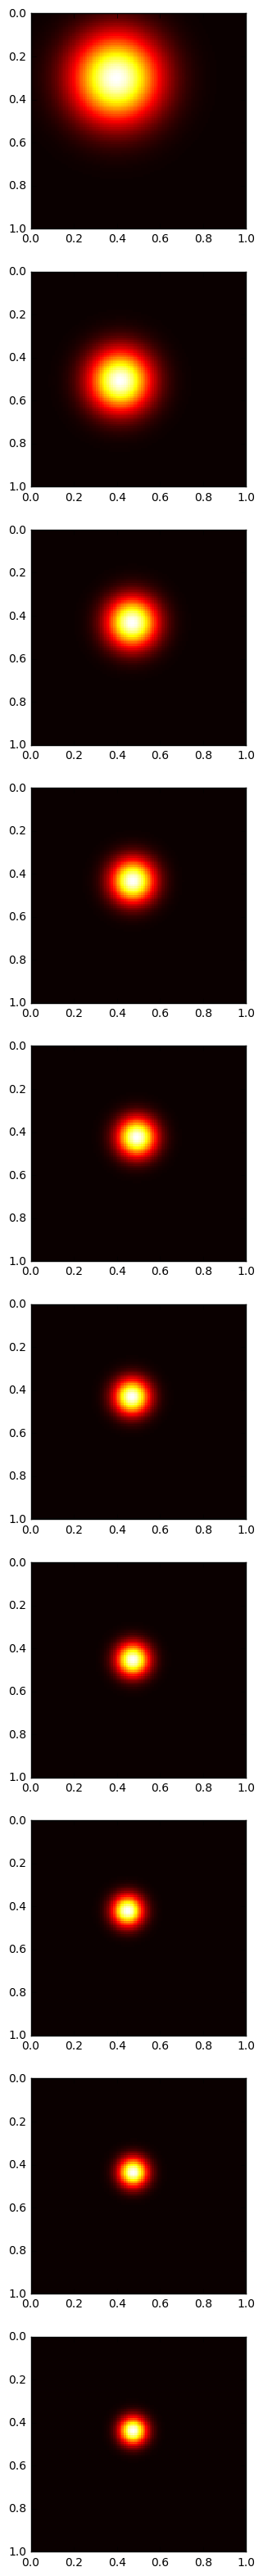

In [19]:
#dwa rozklady

from scipy.stats import multivariate_normal



nb_iters = 10
nb_samples = 50
grid_size = 100

var_arr = [[1,0],[0,1]]
mean_vector1 = [0.3, 0.3]
mean_vector2 = [0.7, 0.7]

print("Dwa rozkłady")
print(mean_vector1[::-1])
print(mean_vector2[::-1])

knowledge = np.ones((grid_size, grid_size)) / (grid_size**2)

fig = plt.figure(1, figsize = (10, 40))
for i in range(nb_iters):
    samples = []
    samples1 = np.random.multivariate_normal(mean_vector1, var_arr, size=int(nb_samples/2))
    samples2 = np.random.multivariate_normal(mean_vector2, var_arr, size=int(nb_samples/2))
    for element in samples1:
        samples.append(element)
    for element in samples2:
        samples.append(element)
        
    new_knowledge = np.zeros((grid_size, grid_size))
    
    denominator = 0
    for row in range(grid_size):
        for column in range(grid_size):
            proposed_mean = np.linspace(0,1,grid_size)[[row, column]]
            denominator += np.prod(multivariate_normal.pdf(samples, mean=proposed_mean, cov=var_arr)) * knowledge[row, column]    
   
    for row in range(grid_size):
        for column in range(grid_size):
            proposed_mean = np.linspace(0,1,grid_size)[[row, column]]
            new_knowledge[row, column] = np.prod(multivariate_normal.pdf(samples, mean=proposed_mean, cov=var_arr)) * knowledge[row, column] / denominator
    knowledge = new_knowledge        
    
    plt.subplot(nb_iters,1,i+1)
    plt.imshow(knowledge, cmap='hot', interpolation='nearest', extent = [0,1,1,0])
    
    
print("Estymowany rozkład ma wartość oczekiwaną równą średniej wyjściowych wartości oczekiwanych. Wynika to z tego, że zakładamy tu normalność rozkładu, który nie jest normalny.")

## Ćwiczenie 10 (4 pkt)
(proszę najpierw przeczytać uwagę dodaną na czerwono w sekcji "Podejście maximum likelihood")

Zdarzenie oznaczone $B_1$: Rzucamy dziesięć razy monetą i otrzymujemy wyniki ORZEŁ, ORZEŁ, RESZKA, RESZKA, ORZEŁ, RESZKA, ORZEŁ, ORZEŁ, ORZEŁ, ORZEŁ.

Zdarzenie oznaczone $B_2$: Poprosiliśmy kolegę, żeby w naszym imieniu rzucił 10 razy monetą i zanotował wyniki. Kolega - w dobrej wierze - zliczał tylko liczbę orłów, wypadło ich 7.

Udowodnić (matematycznie), że dla dowolnego rozkładu a priori parametru $\theta$ zachodzi równość rozkładów a posteriori:
$$P(\theta\mid B_1) = P(\theta\mid B_2)$$
Innymi słowy, kolejność wyników rzutu monetą faktycznie nie niesie za sobą żadnej informacji, która jest przydatna przy estymowaniu parametru $\theta$.

Zauważmy najpierw, że $P(B_2 \mid \theta) = P(B_1 \mid \theta) \cdot {7 \choose 10}$. Wynika to wprost z przemienności mnożenia i faktu, że spośród 10 rzutów możemy wybrać 7 orłów na ${7 \choose 10}$ sposobów. Weźmy bowiem zdarzenie $B_1$. Jego prawdopodobieństwo pod warunkiem $\theta$ wynosi $\theta^{7}(1-\theta)^{3}$, tyle samo co prawdopodobieństwo każdego ze ${7 \choose 10}$ zdarzeń, w którym wylosowaliśmy 7 orłów. Zdarzenia te są oczywiście rozłączne, więc prawdopodobieństwo ich sumy pod warunkiem $\theta$ jest równe ${7 \choose 10} \cdot P(B_1 \mid \theta)$.

Ponieważ równość ${7 \choose 10} \cdot P(B_1 \mid \theta) = P(B_2 \mid \theta)$ zachodzi dla dowolnego $\theta$, otrzymujemy równość ${7 \choose 10} \cdot P(B_1) = P(B_2)$.

Przejdźmy teraz do rozkładów a posteriori. Wprost z definicji, dla dowolnego rozkładu $\theta$, mamy:

$$P(\theta\mid B_2) = \dfrac{P(B_2 \mid \theta) \cdot P(\theta)}{P(B_2)} = \dfrac{{7 \choose 10} \cdot P(B_1 \mid \theta) \cdot P(\theta)}{{7 \choose 10} \cdot P(B_1)} = \dfrac{P(B_1 \mid \theta) \cdot P(\theta)}{P(B_1)} = P(\theta\mid B_1)$$

Co było do pokazania.
